
**Waze Jam Data Analysis**

A sample of one day was taken to perform a general analysis of the Waze Jam data




In [ ]:
!pip install geopandas
!pip install geojson
!pip install dbf
!pip install seaborn 

In [3]:
import geopandas as gpd
import geojson as gjs
import seaborn as sns
from geopandas import GeoDataFrame
from shapely.geometry import Point, LineString
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas import json_normalize
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
### reading data .shp waze jam
import pandas as pd
df_shp = gpd.read_file("/content/drive/My Drive/Movilidad_marcela/data/V2_Waze_Routes.shp")
df_shp.head(2)
#df = pd.read_csv('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data ejemplo/Bitcarrier/sep_vel.csv')

,Id,Name,FromName,ToName,Type_,Length,JamLevel,HistoricTi,Time_,UpdateTime,UpdateTi_1,Velocity,ReceptionT,QuarterHou,Hour_,WeekDay,PeakHour,objectid,globalid,geometry
0,11271,OIS_MDL_AC13_RIO_BOGOTA_TO_BOYACA_WE,Av. Centenario / Calle 17 > Oriente,Calle 13 > Oriente,STATIC,7517,4,1152,3823,1.582922e+12,2020-02-28,3.6,2020-02-28,30 - 45,15,Friday,None,1,{9E1B1CD6-26E0-4877-BBA6-7E17BD4411A6},"LINESTRING (-74.17222 4.69608, -74.17192 4.696..."
1,21136,STGV_STGV_CL80_KR107_TO_KR114_EW_LENTA,Calle 80 > Occidente - Calz Lateral,Calle 80 > Occidente Calz. Lateral,STATIC,823,4,164,651,1.582922e+12,2020-02-28,3.6,2020-02-28,30 - 45,15,Friday,None,2,{40359597-A026-43B8-B02B-1883C3AD1F38},"LINESTRING (-74.11664 4.71569, -74.11722 4.716..."


In [17]:
df_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Id          10000 non-null  object  
 1   Name        10000 non-null  object  
 2   FromName    10000 non-null  object  
 3   ToName      10000 non-null  object  
 4   Type_       10000 non-null  object  
 5   Length      10000 non-null  int64   
 6   JamLevel    10000 non-null  int64   
 7   HistoricTi  10000 non-null  int64   
 8   Time_       10000 non-null  int64   
 9   UpdateTime  10000 non-null  float64 
 10  UpdateTi_1  10000 non-null  object  
 11  Velocity    10000 non-null  float64 
 12  ReceptionT  10000 non-null  object  
 13  QuarterHou  10000 non-null  object  
 14  Hour_       10000 non-null  object  
 15  WeekDay     10000 non-null  object  
 16  PeakHour    2626 non-null   object  
 17  objectid    10000 non-null  int64   
 18  globalid    10000 non-null  object  
 1

In [16]:
df_shp.describe()

,Length,JamLevel,HistoricTi,Time_,UpdateTime,Velocity,objectid
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,4099.040400,2.466800,767.209900,926.493800,1.582929e+12,13.932360,5002.941200
std,3925.340498,0.762598,627.684318,791.736786,3.797498e+06,8.439966,2891.054532
min,179.000000,1.000000,43.000000,41.000000,1.582922e+12,0.000000,1.000000
25%,963.000000,2.000000,254.000000,301.750000,1.582925e+12,7.200000,2500.750000
50%,2234.000000,2.000000,531.000000,637.000000,1.582928e+12,10.800000,5000.500000
75%,6807.000000,3.000000,1263.000000,1446.250000,1.582932e+12,18.000000,7500.250000
max,17597.000000,4.000000,3222.000000,5874.000000,1.582935e+12,46.800000,10100.000000


In [27]:
print(len(df_shp["Name"].unique()))
print(len(df_shp["geometry"].unique()))

149
170


In [47]:
top_name = df_shp["Name"].value_counts()[0:10]
top_name = list(top_name.index)


A general idea of ​​how long the vehicle has the waze on


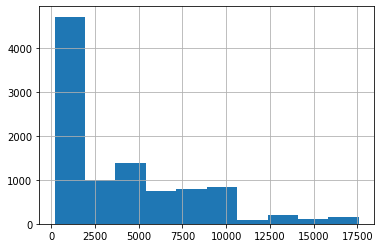

In [6]:
df_shp["Length"].hist()

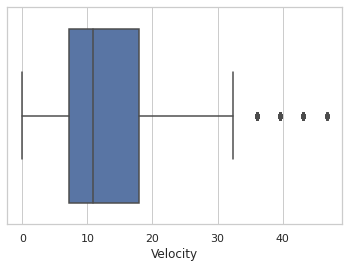

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_shp["Velocity"])

In [ ]:
df_shp["Velocity"].describe()

count    10000.000000
mean        13.932360
std          8.439966
min          0.000000
25%          7.200000
50%         10.800000
75%         18.000000
max         46.800000
Name: Velocity, dtype: float64

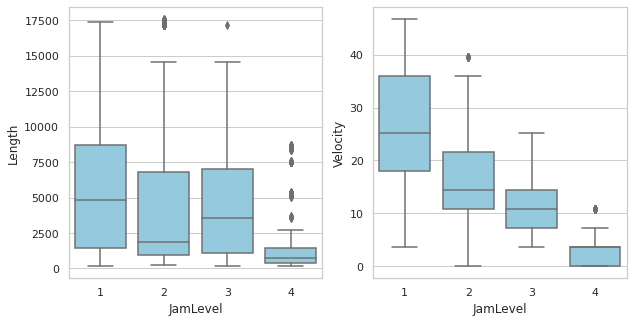

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="JamLevel", y="Length",data=df_shp, color="skyblue")
plt.subplot(1,2,2)
sns.boxplot(x="JamLevel", y="Velocity",data=df_shp, color="skyblue")

### A mayor nivel de trafico menor velocidad de desplazamiento
## la longitud del tramo es menor cuando el nivel de trafico es mayor

Boxplot with the road sections with the most waze counts.


<Figure size 720x216 with 0 Axes>

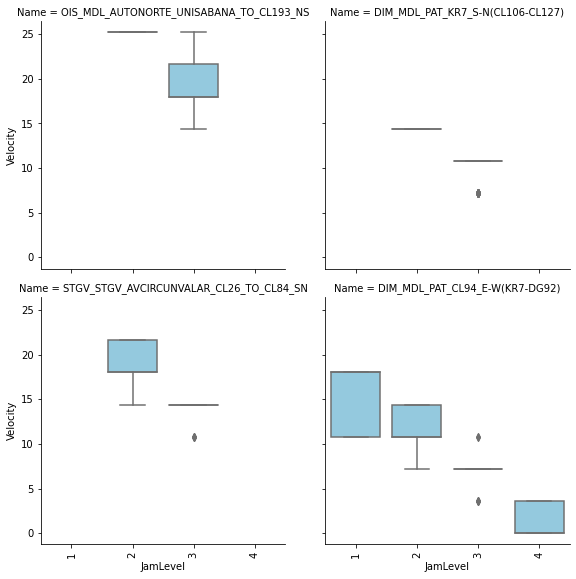

In [86]:
df_shp2 = df_shp[df_shp["Name"].isin(top_name[0:4])]
plt.figure(figsize=(10,3))
 # plt.subplot(1,2,i)
#sns.boxplot(x="JamLevel", y="Velocity",color="skyblue",data=df_shp2)


gp = sns.catplot(x="JamLevel", y="Velocity",col="Name",data=df_shp2, kind="box",
     color="skyblue", height=4, col_wrap=2)

gp.set_xticklabels(rotation=90)

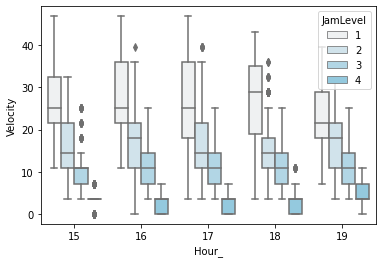

In [84]:
ax_hour = sns.boxplot(x="Hour_", y="Velocity",data=df_shp,hue="JamLevel", color="skyblue")

<Figure size 720x216 with 0 Axes>

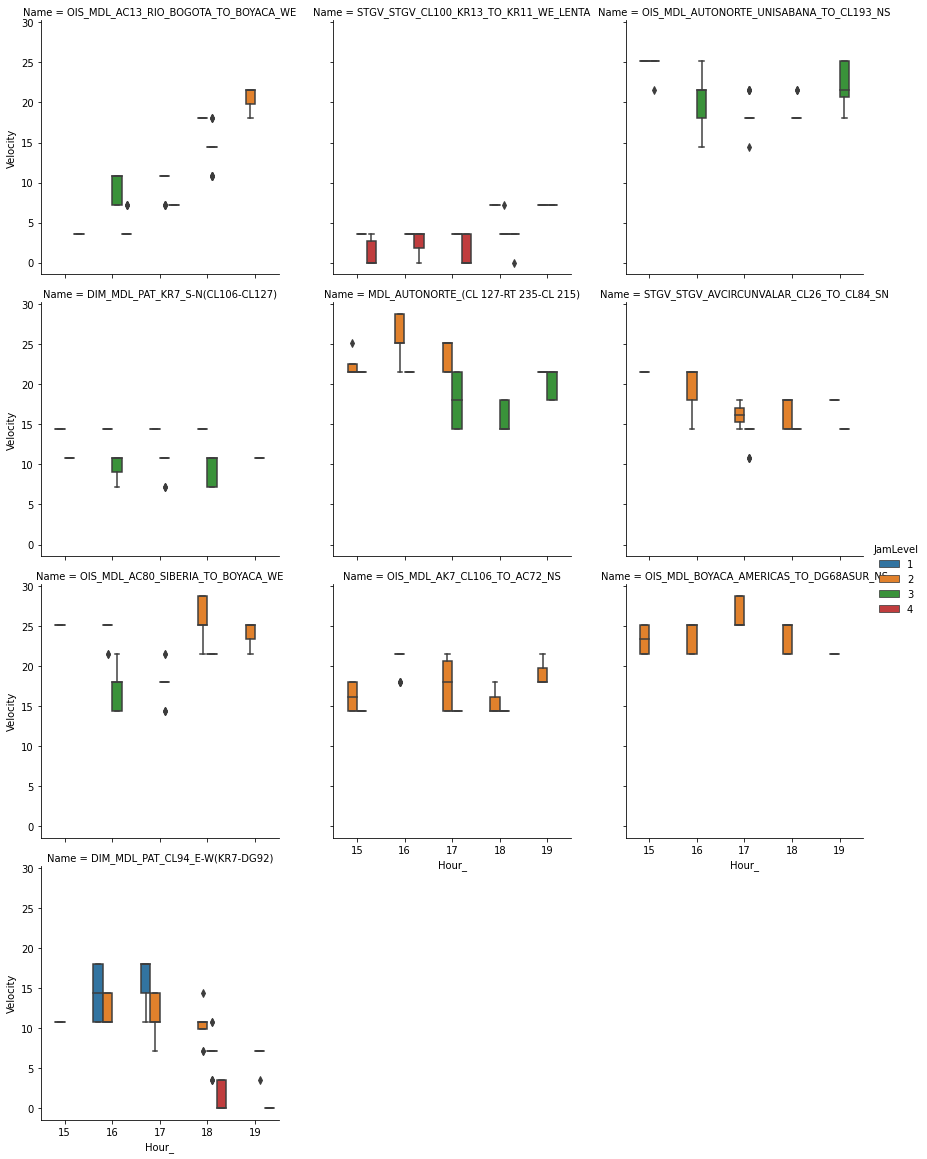

In [83]:
df_shp2 = df_shp[df_shp["Name"].isin(top_name)]
plt.figure(figsize=(10,3))
 # plt.subplot(1,2,i)
#sns.boxplot(x="JamLevel", y="Velocity",color="skyblue",data=df_shp2)


gp = sns.catplot(x="Hour_", y="Velocity",col="Name",hue="JamLevel",data=df_shp2, kind="box",
    height=4, col_wrap=3)

#gp.set_xticklabels(rotation=90)